In [1]:
#Importing necessary libraries
import pandas as pd

In [2]:
#Loading dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
#Checking any null/NA/zero values exist in the dataset or not
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
(df==0).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Cleaning data
df = df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)':'Spending_Score',
})

In [8]:
#Converting categorical 'Gender' to numeric
df['Gender'] =df['Gender'].map({'Male':0,'Female':1})

In [9]:
#Preparing data for clustering
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['CustomerID','Gender'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [11]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

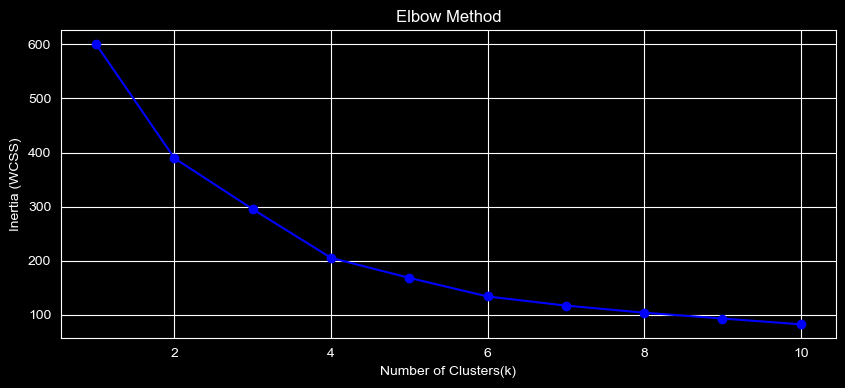

In [13]:
#Finding optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia =[]
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k,random_state=42,n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize = (10,4))
plt.plot(K_range, inertia,'bo-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()
plt.style.use('dark_background')


In [14]:
#Silhoutte Score
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k:{k}: {score:.3f}")

Silhouette Score for k:2: 0.335
Silhouette Score for k:3: 0.358
Silhouette Score for k:4: 0.404
Silhouette Score for k:5: 0.417
Silhouette Score for k:6: 0.428
Silhouette Score for k:7: 0.417
Silhouette Score for k:8: 0.408
Silhouette Score for k:9: 0.418
Silhouette Score for k:10: 0.407


In [15]:
#Fitting the model
final_k = 5
kmeans = KMeans(n_clusters=final_k,random_state=42,n_init=10)
df['Clusters'] = kmeans.fit_predict(X_scaled)


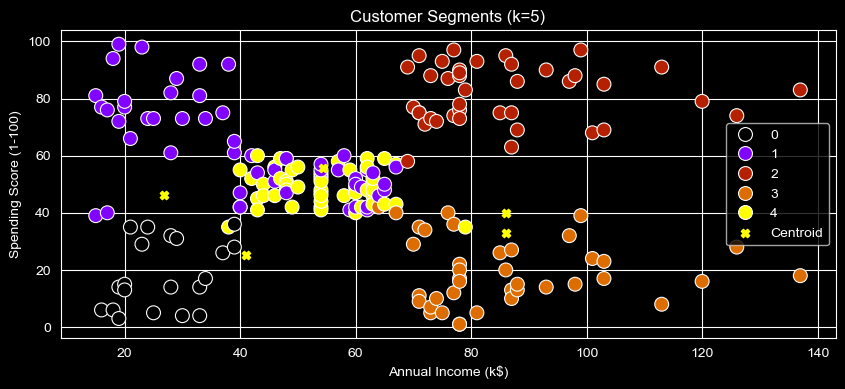

In [16]:
#2D visualization(Annual Income vs Spending Score)
import seaborn as sns

plt.figure(figsize = (10,4))
sns.scatterplot(
    x=df['Annual_Income'],y=df['Spending_Score'],
    hue=df['Clusters'],palette='gnuplot',s=100
)
centroid = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroid[:,1],centroid[:,0],
    c='yellow',marker='X',label='Centroid'
)

plt.title('Customer Segments (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
df['Clusters'] = kmeans.labels_

In [18]:
#Cluster Profiling
cluster_summary = df.groupby('Clusters')[['Age','Annual_Income','Spending_Score']].mean()
print(cluster_summary)

                Age  Annual_Income  Spending_Score
Clusters                                          
0         46.250000      26.750000       18.350000
1         25.185185      41.092593       62.240741
2         32.875000      86.100000       81.525000
3         39.871795      86.102564       19.358974
4         55.638298      54.382979       48.851064


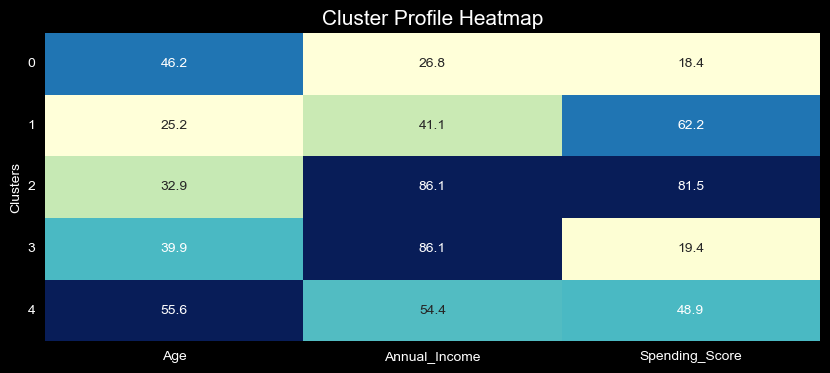

In [19]:
#Visualization of cluster_summary
normalized_profile =(cluster_summary - cluster_summary.min())/ (cluster_summary.max() - cluster_summary.min() )

plt.figure(figsize = (10,4))
sns.heatmap(normalized_profile,annot=cluster_summary.round(1),fmt='',cmap='YlGnBu',cbar=False)
plt.title('Cluster Profile Heatmap',fontsize=15)
plt.yticks(rotation=0)
plt.show()

